# Decision Tree

All credit for this document goes to: [Decision Tree Machine Learning in Python | KGP Talkie](https://kgptalkie.com/decision-tree-machine-learning-in-python-kgp-talkie/)

## Concept

A decision tree us a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node representa the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visalization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret

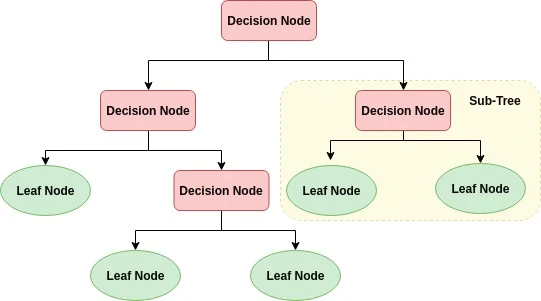

## Why Decision Tree

- Decision trees often mimic the human level thinking so its simple to understand the data make some good interpretations.
- Decision trees actually make you see the logic for the data to interpret(not like black box algorithms like SVM, NN, etc...)

## How Decision Tree Works

- Select the best attribute using Attribute Selection Measures (ASM) to split the records.
- Make that attribute a decision node and breaks the dataset into smaller subsets.
- Starts three building by repeating this process recursively for each child until one of the condition will match:
  - All the tuple belong to the same attribute value.
  - There are no more remaining attributes.
  - There are no more instances.

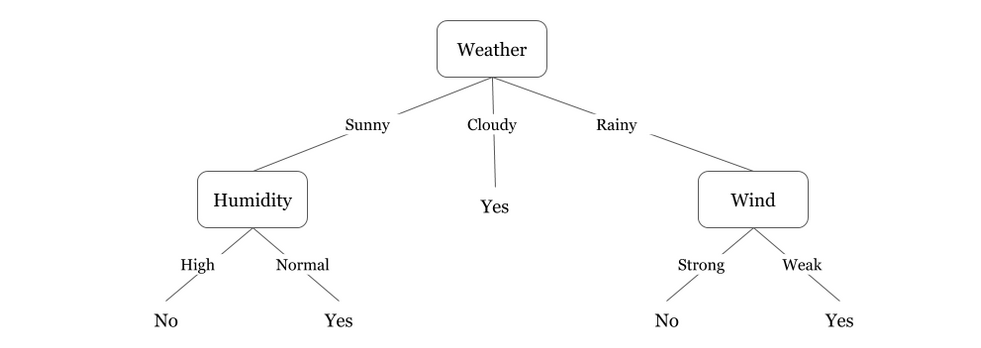

Here couple of algorithms to build a decision tree, we only talk about a few which are: 

- CART (Classification and Regression Trees) --> Uses Gini Index (Classification) as metric.
- ID3 (Iterative Dichotomiser 3) --> uses Entropy function and Information gain as metrics.

## Decision Making in DT with Attribute Selection Measures(ASM)

- Information Gain
- Gain Ratio
- Gini Index

### Information Gain

In order to define information gain precisely, we begin by defining a measure commonly used in information theory, called entropy, that characterizes the impurity of an arbitrary collection of examples

#### Entropy

Entropy $H(S)$ is the measure of the amount of uncertainity in the data set $S$ (i.e. entropy characterizes the data set $S$)

$$ H(S) = \sum_{c \in C} -p(c) log_{2} p(c) $$

Where: 
- $ S $ = The current data set for which entropy is being calculated (changes every iteration of the ID3 algorithm)
- $ C $ = Set of classes in $S$, C={ yes, no }
- $ p(c) $ = The proportion of the number of elements in class $c$ to the number of elements in set $S$

When $H(S) = 0$, the set $S$ in perfectly classified (i.e. all elements in $S$ are of the same class)

In ID3, entropy is calculated for each remaining attribute. The attribute with the smallest entropy is used to split the set $S$ on this iteration. The higher the entropy, the higher the potential to improve the classification here. 



#### Information Gain

Information Gain $IG(A)$ is the measure of the difference in entropy from before to after the set $S$ is split on an attribute $A$. In other word, how much uncertainly in $S$ was reduced after spliting set $S$ on atribute $A$

$$ IG(A,S) = H(S) - \sum_{t<T} p(t)H(t) $$

Where:
- $ H(S) $ = Entropy of set $S$
- $ T $ = The subsets created from spliting set $S$ by attribute $A$ such that $ S = \bigcup_{t<T} t $
- $ p(t) $ = The proportion of the number of elements in $t$ to he number of elements in set $S$
- $ H(t) $ = Entropy of subset $t$

In ID3 information gain can be calculated (instead of entropy) for each remaining attribute. The attribute with the largest information gain is used to split the set $S$ on this iteration

1. Compute the entropy for data-set
2. For every feature: 
  - Calculate entropy for all categorical values
  - Take average information entropy for the current attribute
  - Calculate gain for the current attribute. Pick the highest gain attribute
3. Repeat until we get the tree we desired

### Gain Ratio

An alternative measure to information gain is gain ratio (Quinlan 1986). Gain ratio tries to the correct the information gain's bias towards attributes with many possible values by adding a denominator to information gain called split information. Split information tries to measure how broadly and uniformly the attribute splits the data: 

$$ SplitInformation(S,A) = - \sum_{i=1}^{e} rac|S_i||S| \cdot log_2 rac|S_i||S| $$

The Gain Ratio is defined in terms of Gain and SplitInformation as:

$$ GainRatio(S,A) \equiv racGain(S,A)SplitInformation(S,A) $$

### Gini Index

Gini Index is a measurement of the likelihood of an incorrect classification of a new instance of a random variable. If that new instance were randomly classified according to the distribution of class labels from the data set.

If our dataset is Pure then likelihood of incorrect classification is 0. If our sample is mixture of different classes then likelihood of incorrect classification will be high.

### Optimizing DT

#### criterion:

Optional (default="gini") or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are "gini" for the Gini Index and entropy for the information gain

#### splitter:

String, optional (default="best") or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

#### max_depth:

Int or None, optional (default="None") or Maximum Depth of a Tree: The maximun depth of the tree. If None, then nodes are expanded until all the leaves containt less than min_samples_split samples. The higher value of maximun depth causes overfitting, and a lower value causes underfitting (source)

### Recursive Binary Splitting

In this procedure all the features are considered and different split points are tried and test using a Cost Function. The split with the best cost (or lowest cost) is selected.

### When to stop splitting?

You might ask when to stop growing a tree? As a problem usually has a large set of features, it results in large number of split, which in turn gives a huge tree. Such trees are complex and can lead to overfitting. So, we need to know when to stop?

### Pruning

The performance of a tree can be further increased by pruning. It involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.

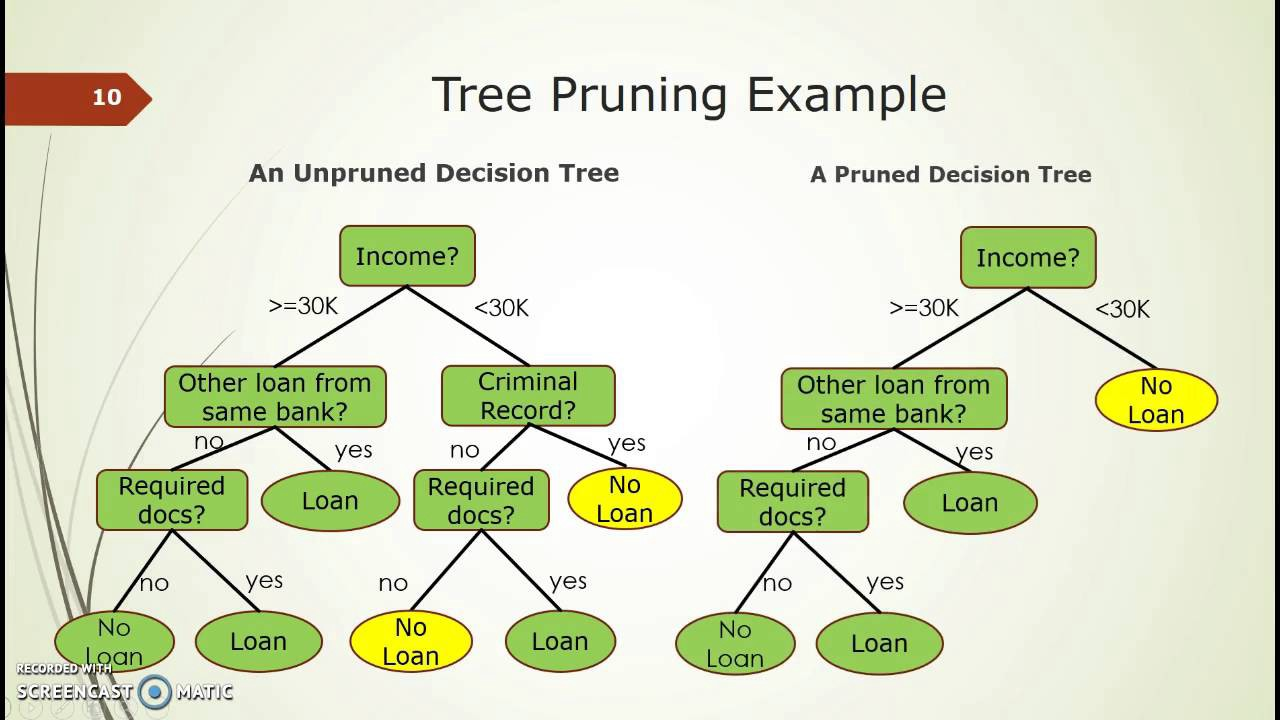

# Decision Tree Regressor

## Let's go to start

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diabetes.target[: 10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [ ]:
X = diabetes.data
y = diabetes.target
X.shape, y.shape

((442, 10), (442,))

In [ ]:
data = pd.DataFrame(X, columns=diabetes.feature_names)
data['target'] = y
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


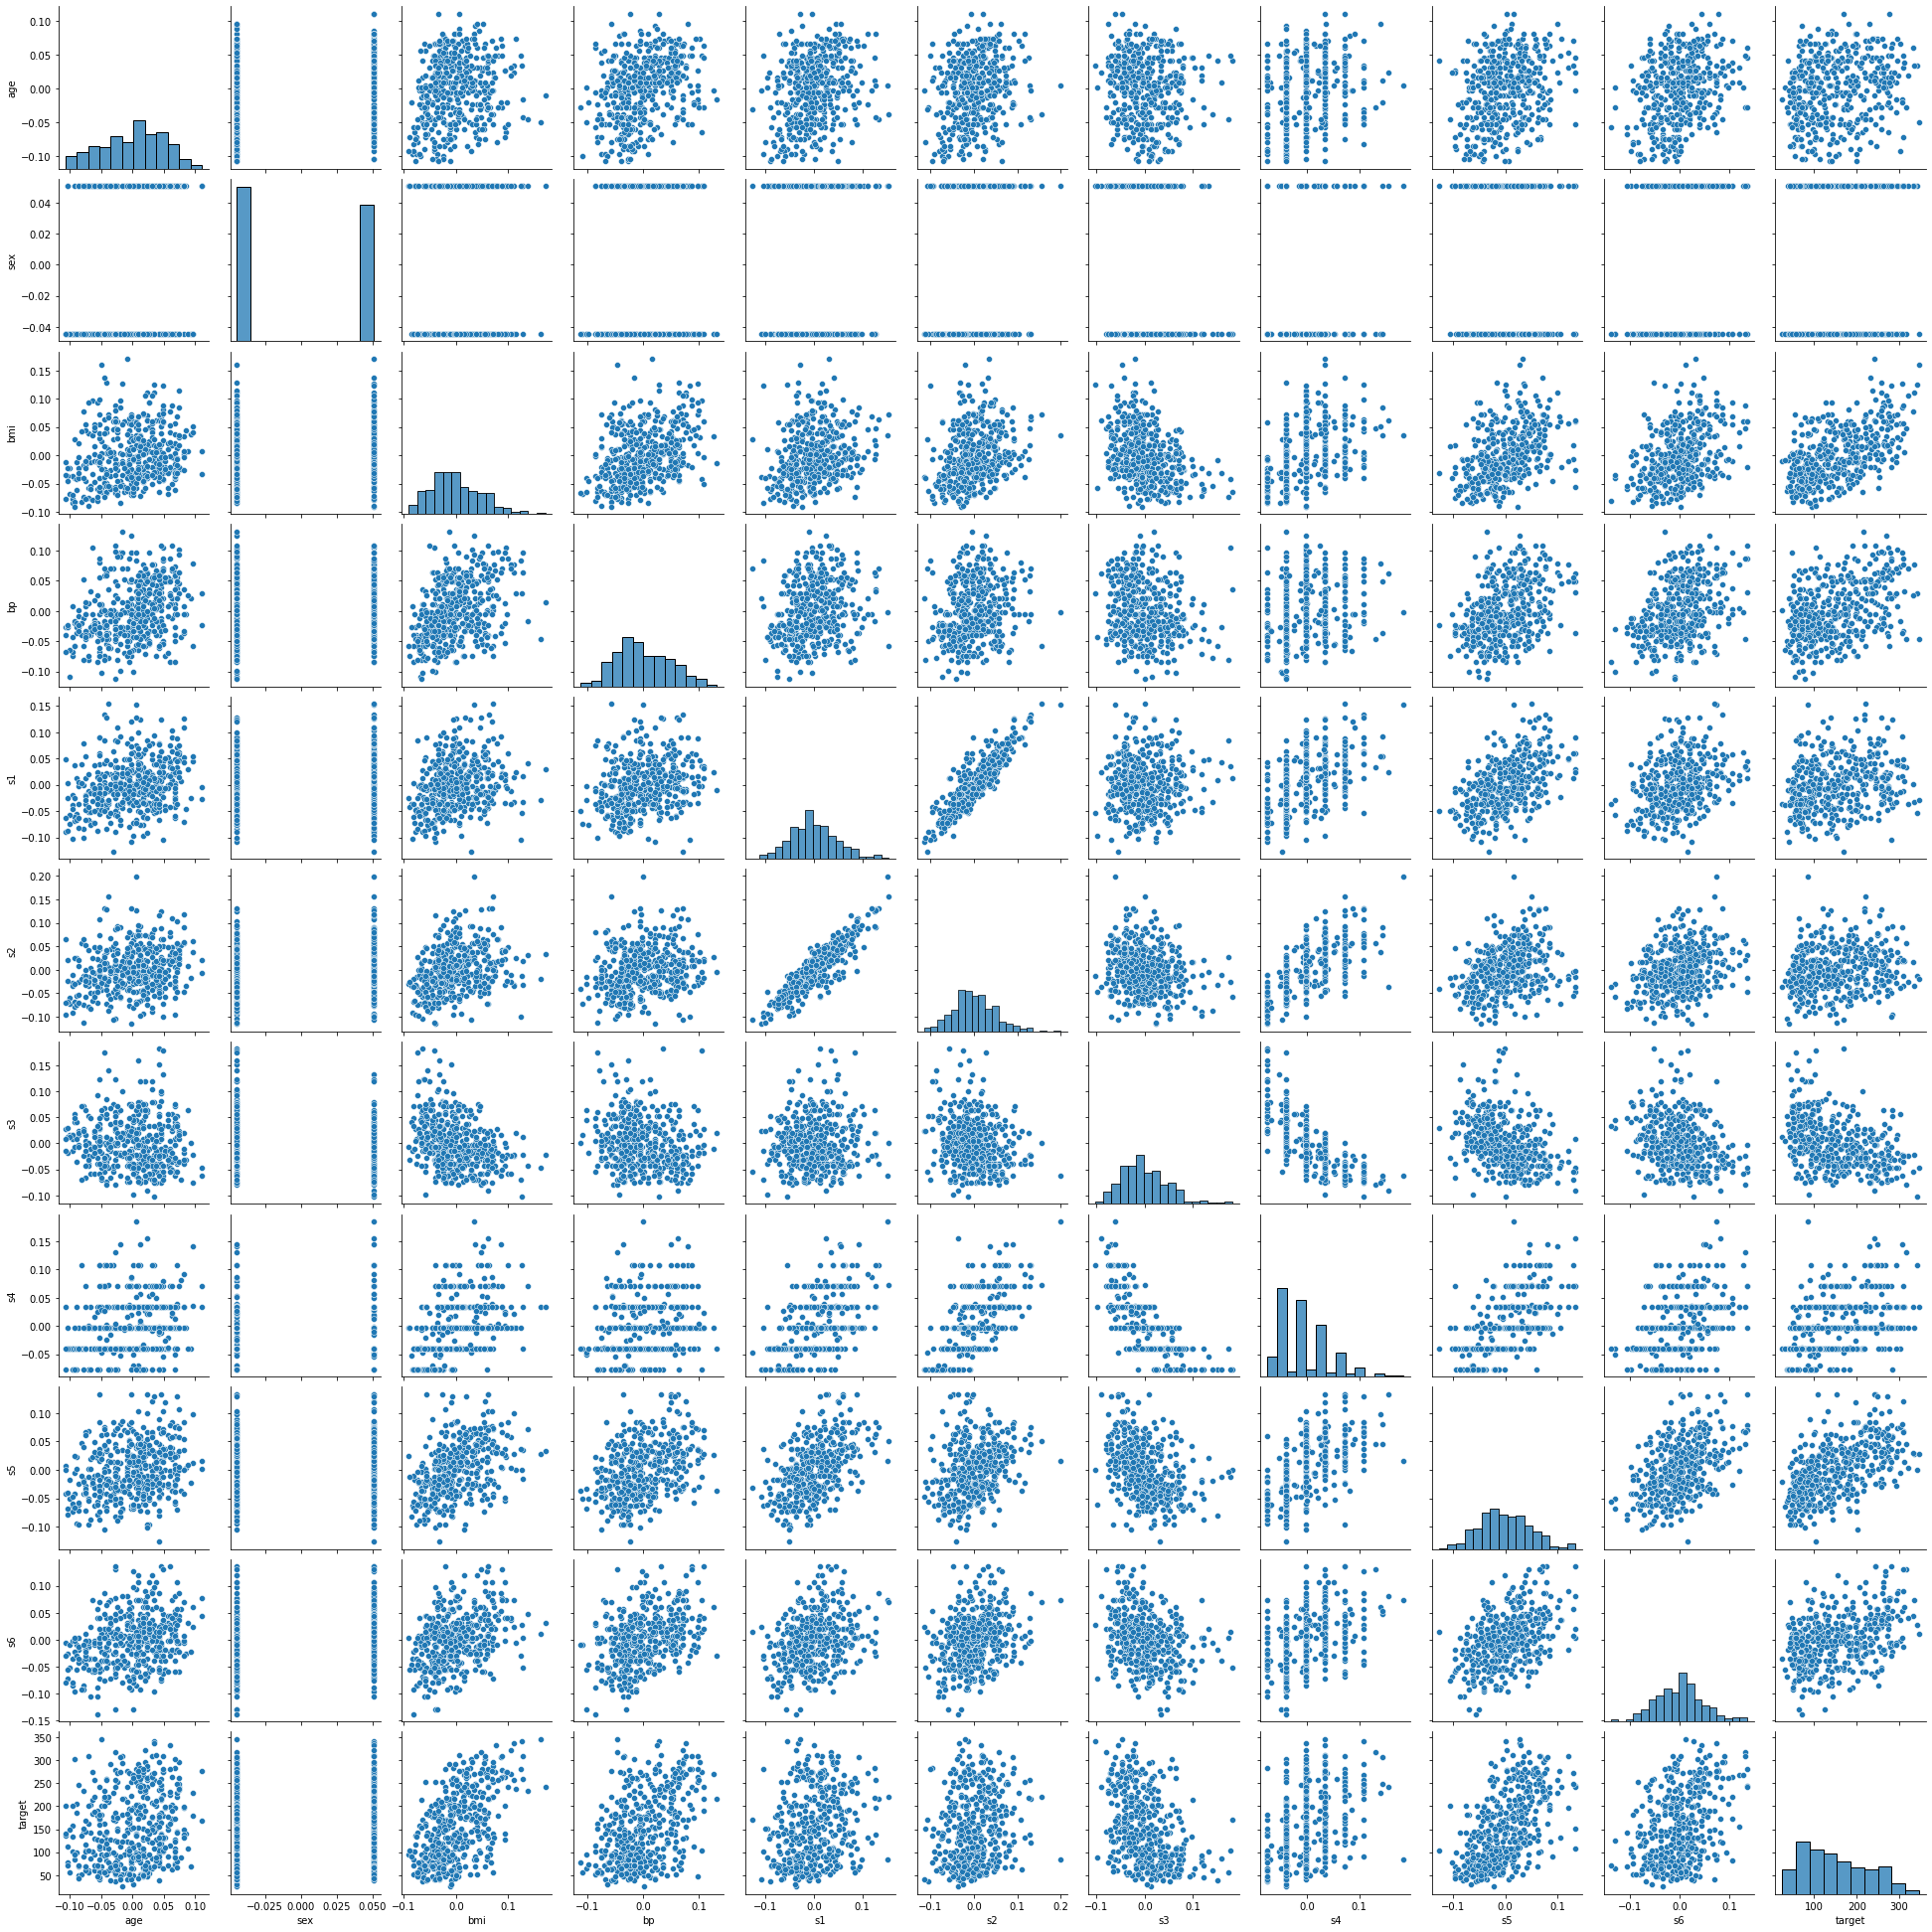

In [ ]:
sns.pairplot(data)
plt.show()

## Decision Tree Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

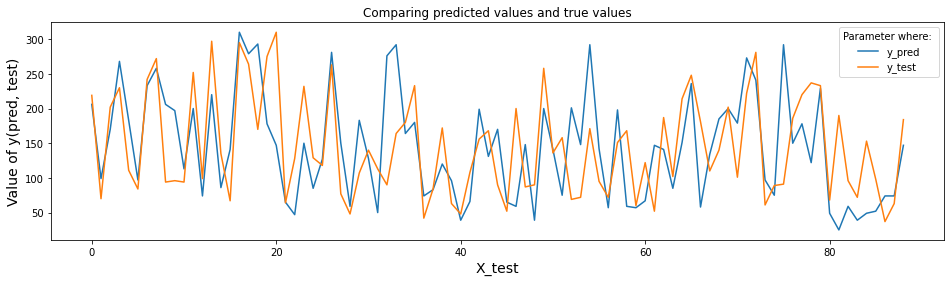

In [ ]:
plt.figure(figsize=(16,4))

plt.plot(y_pred, label='y_pred')
plt.plot(y_test, label='y_test')

plt.xlabel('X_test', fontsize=14)
plt.ylabel('Value of y(pred, test)', fontsize=14)

plt.title('Comparing predicted values and true values')
plt.legend(title='Parameter where: ')

plt.show()

Now, we will try to get the Root Mean Square Error of the data by using the function mean_squared_error(). Let's see the following code:

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

70.61829663921893

In [ ]:
y_test.std()

72.78840394263774

## Decision Tree as a Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Use Iris data set

In [ ]:
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris.data
y = iris.target
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


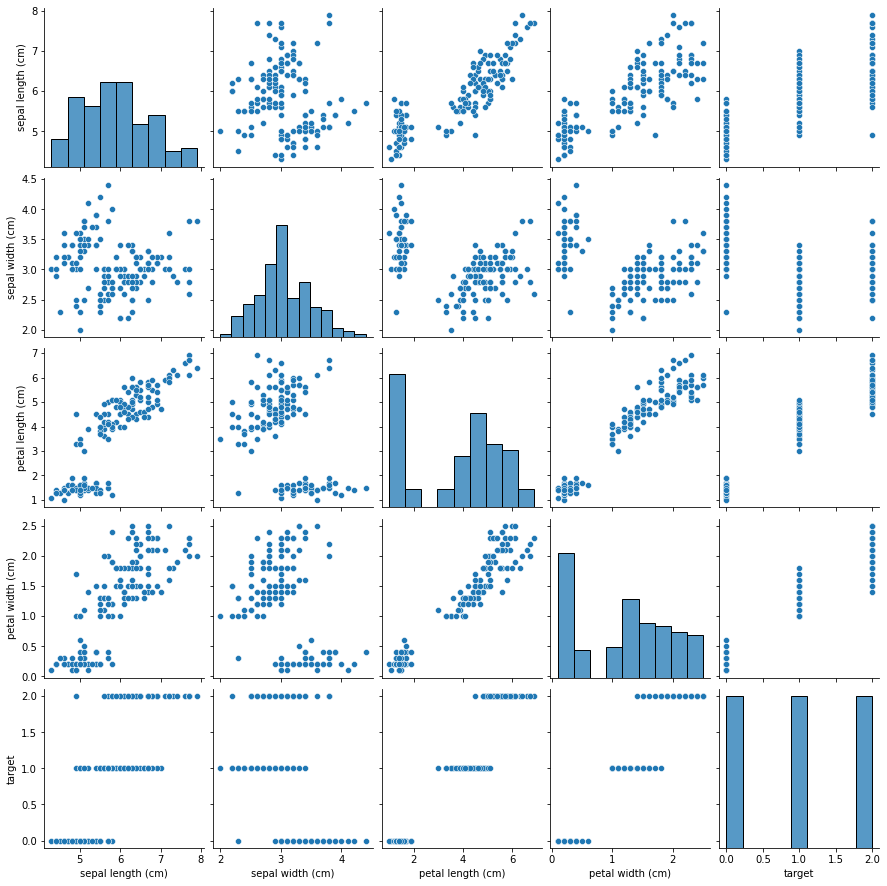

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)
classifier = DecisionTreeClassifier(criterion='gini', random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9666666666666667


Now we will evalute the accuracy of the classifier by using confusion matrix. For this we will use function confusion_matrix(). Each cell in the square box represents relateve or absolute ratios between y_test and y_pred.  
Now let's see the following script:

Confusion Matrix


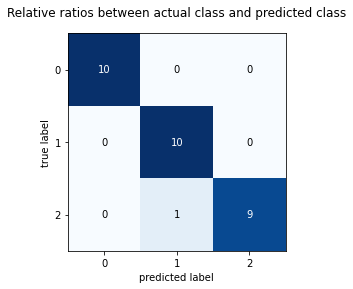

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print('Confusion Matrix')

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

plt.show()

## Classification_report()

The classification_report function builds a text report showing the main classification metrics. Here is a small example with custom target_names and inferred labels. Now we will use of this function in the following code:

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

